----------------------------------
# Case Study: Predicting Used Cars Prices Using  **Linear Regression**
----------------------------------

## Context: 
    
- There is a huge demand for used cars in the Indian Market today.
- The pre-owned car market has continued to grow over the past years and is larger than the new car market now.
- Cars4U is a budding tech start-up that aims to find footholes in this market.
- In this case study, we will build a linear regression model for Cars4U to predict the prices of used cars, and to see the effect of various factors on prices to help tech start-up achieve its goal.

## Probelm:

- Explore and visualize the dataset.
- Determine the distributions of the variables and how they relate to each other,
- Build a linear regression model to predict the prices of used cars.
- Determine the predicting variables that actually affect the prices of used cars.
- Generate a set of insights and recommendations that will help the business.

## Attribute Information:

- S.No.: Serial Number
- Name : Name of the car which includes Brand name and Model name
- Location : The location in which the car is being sold or is available for purchase Cities
- Year : Manufacturing year of the car
- Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
- Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- Transmission : The type of transmission used by the car. (Automatic / Manual)
- Owner : Type of ownership
- Mileage : The standard mileage offered by the car company in kmpl or km/kg
- Engine : The displacement volume of the engine in CC.
- Power : The maximum power of the engine in bhp.
- Seats : The number of seats in the car.
- New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
- Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Importing necessary libraries

In [5]:
import warnings
warnings.filterwarnings("ignore") # to avoid warnings
# Import the necessary packages 
import pandas as pd    
pd.set_option('display.float_format', lambda x: '%5f' % x) # To supress numerical display in scientific notations
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set(color_codes = True) 
from sklearn.linear_model import LinearRegression # To create linear regression model
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # To check model performance

 ## Loading the data

In [6]:
# Reading in the Dataset
dfCars4UOriginal = pd.read_csv('used_cars_data.csv')
# Making a copy of data
dfCars4U=dfCars4UOriginal.copy()
# drop any duplicate observations if any exists.
dfCars4U = dfCars4U.drop_duplicates()
#Getting an overall information about the dataset
dfCars4U.info()
#View 10 sample rows of the dataset
dfCars4U.sample(10)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 850.0+ KB


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
568,568,Jeep Compass 2.0 Limited,Jaipur,2018,29000,Diesel,Manual,First,17.1 kmpl,1956 CC,170 bhp,5.000000,22.95 Lakh,19.000000
7071,7071,Hyundai i20 Magna,Ahmedabad,2009,90000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.000000,NaN,nan
4659,4659,Honda City i VTEC VX Option,Mumbai,2016,42000,Petrol,Manual,First,17.8 kmpl,1497 CC,117.3 bhp,5.000000,NaN,9.250000
4868,4868,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2013,88000,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.000000,NaN,16.250000
1035,1035,BMW 5 Series 2010-2013 525i,Hyderabad,2008,61000,Petrol,Automatic,Second,10.8 kmpl,2497 CC,215 bhp,5.000000,NaN,11.000000
233,233,Maruti Swift ZDi,Hyderabad,2016,64000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.000000,NaN,6.800000
6161,6161,Volkswagen Vento Diesel Highline,Jaipur,2011,157301,Diesel,Manual,Second,20.54 kmpl,1598 CC,103.6 bhp,5.000000,NaN,nan
615,615,Toyota Innova Crysta 2.4 GX MT 8S,Hyderabad,2017,52000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,8.000000,19.43 Lakh,17.500000
6271,6271,Maruti Alto K10 2010-2014 VXI,Mumbai,2010,15669,Petrol,Manual,First,20.92 kmpl,998 CC,67.1 bhp,5.000000,NaN,nan
468,468,Hyundai Santro Xing GLS,Bangalore,2008,46000,Petrol,Manual,Second,17.92 kmpl,1086 CC,62.1 bhp,5.000000,NaN,2.220000


**Observations**
* There are 7253 rows and 14 columns
* Dependent Variable is Price
* The column S.No is just a duplicate of the index, it will be dropped.
* Currently Mileage, Engine, Power and New_Price are categorical variables, we need to transform them to numerical variables
* the Dtype of Name, Location, Fuel_Type, Transmission, and Owner_Type columns is object, we need to transform them to category type.
* Some columns have missing values, we need to further investigate these columns and fix them.

## Exploring, Visualizing, and Preparing the Data

In [7]:
# Dropping the S.No column
dfCars4U.drop(['S.No.'], axis=1, inplace=True)


### Transforming Power, Engine, Mileage, and New_Price columns to Numerical Dtype

#### Power Transformer Function:

In [8]:
def power_to_num(pos_val):
    """For each value, return the number part of the string 
    unless it is not a string value:NaN or a string with no digits:
    'null bhp' then return np.nan
    """
    if isinstance(pos_val, str) and pos_val.find('null')==-1 :
        #  replace space with empty string, then lower case the string and remove the metric bhp
        return float(pos_val.replace(' ','').lower().strip('bhp'))
    else:
        return np.nan

#### Engine Transformer Function:

In [9]:
def engine_to_num(pos_val):
    """For each value, return the number part of the string
    unless it is not a string valu:NaN then return np.nan 
    """
    if isinstance(pos_val, str):
        #  replace space with empty string and remove the metric cc
        return float(pos_val.replace(' ','').lower().strip('cc') )
    else:
        return np.nan

#### Mileage Transformer Function:

In [10]:
def mileage_to_num(pos_val):
    """For each value, return the number part of the string 
    unless it is not a string value:NaN  then return np.nan
    """
    if isinstance(pos_val, str):
         #  replace space with empty string, then lower case the string and remove the metric kmpl, or the metric km\kg,or km/
        return float(pos_val.replace(' ','').lower().strip('kmpl').strip('km\kg').strip('km/') )
    else:
        return np.nan

#### New_Price Transformer Function:

In [11]:
def new_price_to_num(pos_val):
    """For each value, return the number part of the string 
    unless it is not a string value:NaN then return np.nan
    """
    if isinstance(pos_val, str):
        #  replace space with empty string then lower case the string and remove the metric lakh, or l,or cr
        return float(pos_val.replace(' ','').lower().strip('lakh').strip('l').strip('cr') )
    else:
        return np.nan

#### Applying the  defined  Transformer Functions to the corresponding Columns

In [12]:
# Dictionary col_transforms is a collection of columns and column-processing functions
# that willl transfer them to float
col_transforms = {
    'Mileage': mileage_to_num,
    'Power': power_to_num,
    'Engine':engine_to_num,
    'New_Price': new_price_to_num,
}

# k is the key, so the column name here and is either:
#   'Mileage' or 'Power' or 'Engine' or 'New_Price'.
# v is the value, which a function in this case and is either:
#   `mileage_to_num` or `power_to_num` or engine_to_num or new_price_to_num.
for k,v in col_transforms.items():
    dfCars4U[k] = dfCars4U[k].map(v)
dfCars4U.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 793.3+ KB


### Investigating and Fixing the missing values

In [13]:
#Checking the missing values per column
dfCars4U.isnull().sum().sort_values(ascending=False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.000000,2179.000000,115.000000,5.000000,nan,17.500000
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.000000,1950.000000,194.000000,5.000000,49.140000,35.670000
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.000000,1086.000000,nan,5.000000,nan,1.300000
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.000000,nan,nan,nan,nan,2.950000
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.000000,1498.000000,99.000000,nan,nan,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6633,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.000000,nan,nan,nan,nan,nan
6697,Hyundai Santro Xing XL,Jaipur,2007,85000,Petrol,Manual,Second,0.000000,1086.000000,nan,5.000000,nan,nan
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.000000,2179.000000,115.000000,5.000000,nan,nan
6957,Honda Jazz 2020 Petrol,Kochi,2019,11574,Petrol,Manual,First,0.000000,1199.000000,88.700000,nan,nan,nan


**Observations**
* Columns Power, Seats, Engine, and Mileage have few missing values. we will impute them using the median
* Column New_Price has about 86% of the data missing. We will try a more comprehensive approach than the mean to impute them. 
* Column Price has 1234 missing values, since it is the independent variable we will drop the rows\observations from the dataset, otherwise we will be in a semi-supervised scenario.

#### Fixing the missing values for columns:Power, Seats, Engine and Mileage

In [10]:
#### Imputing the missing values for Power, Seats, Engine and Mileage with the median of each column
for col in ['Power', 'Seats', 'Engine', 'Mileage']:
    dfCars4U[col]=dfCars4U[col].fillna(dfCars4U[col].median())

#### Fixing the missing values for the column New_Price:
- We will replace the missing values via three levels:
  * First with the New_Price median after grouping the dataset by the brand and the year.
  * Then the rest of the missing value with the New_Price median after grouping the dataset by year.
  * Lastly the rest of the missing values with the New_Price median of the dataset.

In [11]:
def get_brand_name(pos_val):
    """Function to extract the brand name from the Name 
    For each value, split the string by space into a list of strings 
     then return the first string of the list which is here the Brand
    """
    # remove any leading or trailng space, then converted to a title format, the split and return first string
    return pos_val.strip().title().split(' ')[0]

In [12]:
# Creating a new column named Brand after exctracting it from the column 'Name'
dfCars4U['Brand']=dfCars4U['Name'].apply(get_brand_name)

In [13]:
# Grouping the dataset by Brand and Year
median_newprice_by_brandYear = dfCars4U.groupby(['Brand','Year'])['New_Price'].median()

# Grouping the dataset Year
median_newprice_by_year = dfCars4U.groupby('Year')['New_Price'].median()

# Imputing New_Price missing values with its grouped by Brand and Year mean if the brand and Year of the row
# are equal to idx[0] and idx[1] respectively.
# idx here is a tuple (Brand,Year)
for idx in median_newprice_by_brandYear.index:
    dfCars4U.loc[(dfCars4U.Brand== idx[0]) & (dfCars4U.Year== idx[1]) & (dfCars4U.New_Price.isnull()), 'New_Price']\
    = median_newprice_by_brandYear[idx]
    
# Imputing New_Price missing values with its  grouped by Year mean if the year of the row is equal to idx
# idx here is an int(Year)
for idx in median_newprice_by_year.index:
    dfCars4U.loc[(dfCars4U.Year== idx) & (dfCars4U.New_Price.isnull()), 'New_Price'] = median_newprice_by_year[idx]
    
# Imputing the rest of New_Price missing values with its dataset median
dfCars4U['New_Price']=dfCars4U['New_Price'].fillna(dfCars4U['New_Price'].median())

#### Fixing the missing values for the column 'Price'

In [14]:
# Dropping the dataset rows where the target is missing
dfCars4U.drop(dfCars4U[dfCars4U['Price'].isnull()]['Price'].index, axis=0,inplace=True)

In [15]:
dfCars4U.isnull().sum().sort_values(ascending=False)

Brand                0
Price                0
New_Price            0
Seats                0
Power                0
Engine               0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Year                 0
Location             0
Name                 0
dtype: int64

**Observations**
* Dataset has no missing values!!

### Quick analysis of the attributes

In [16]:
# Making sure that all Names, Owner_Type and Locations will have the same format to get the correct unique count
# for each categorical cout. For Fuel_Type and Transmission we can validate that with the given Data dictionary
dfCars4U.Name= dfCars4U['Name'].str.title()
dfCars4U.Owner_Type = dfCars4U['Owner_Type'].str.title()
dfCars4U.Location= dfCars4U['Location'].str.title()
# Getting statistical information about the attributes
dfCars4U.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6019,1852,Maruti Swift Dzire Vdi,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.000000,NaN,NaN,NaN,2013.358199,3.269742,1998.000000,2011.000000,2014.000000,2016.000000,2019.000000
Kilometers_Driven,6019.000000,NaN,NaN,NaN,58738.380296,91268.843206,171.000000,34000.000000,53000.000000,73000.000000,6500000.000000
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.000000,NaN,NaN,NaN,18.134969,4.581528,0.000000,15.170000,18.160000,21.100000,33.540000
Engine,6019.000000,NaN,NaN,NaN,1620.509221,599.635458,72.000000,1198.000000,1493.000000,1969.000000,5998.000000
Power,6019.000000,NaN,NaN,NaN,112.795634,53.311727,34.200000,78.000000,94.000000,138.030000,560.000000


**Observations**
* Fuel_Type(5) and Transmission(2) unique categorical value count matchs the given data.
* There are 1852 different car names, Name is a categorical variable that will be hotencoded which will drastically expand the dimensionality. We will drop the Name and keep the brand which has 30 possible values.
* Most of the cars sold are Diesel Fuel with Manual transmission and First Owner.
* Most cars sold are in Mumbai.
* The cars are sold or being offered for sale in 11 different locations.
* The oldest car sold was Manufactured in 1998 and the newest in 2019.
* The mean of Price,New_Price,Engine, and Power attributes are close to the 75% percentile of the data, indicating a right skew.  
* The min for Seats and Engine is 0, which is clearily an outlier value. 


### Univaraite Analysis of Numerical variables

#### Distribution of each numerical variable.

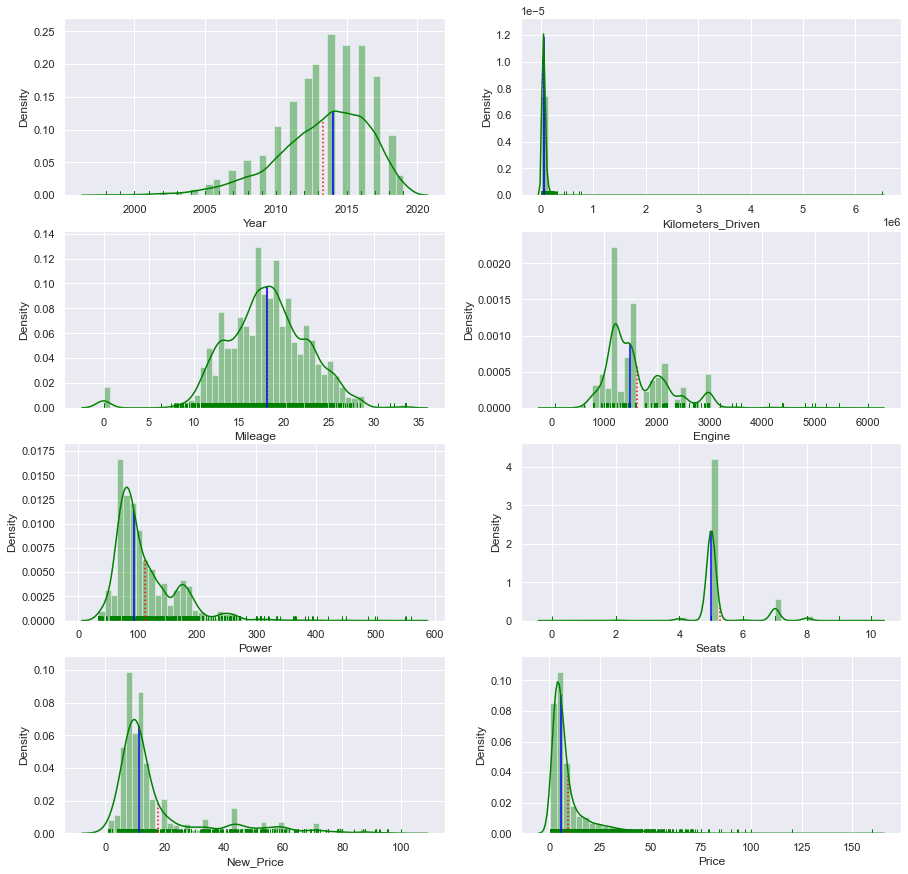

In [17]:
# plotting histograms for all numerical variables.

# List of numerical varaibles.
numerical_col = dfCars4U.select_dtypes(include=np.number).columns.tolist()
# A plot with 4 rows and 2 columns, both zero indexed. 
# Row i and Column j represented by axes[i,j] will represnt one histogram
# For example the 4th numerical variabble from numerical_col will have an index equal to 3
# int(3/2)=1 and 3%2=1(the rest) that will be in row number 1 and column number 1
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
for i in range(len(numerical_col)):    
    ax= sns.distplot(ax=axes[int(i/2), i%2], x=dfCars4U[numerical_col[i]], color='green' ,rug=True, axlabel=numerical_col[i]) 
    line = ax.lines[0]
    xs = line.get_xdata()
    ys = line.get_ydata()
    # Plotting a dotted  red line for the mean after calculting the mean and the height of the line
    mean = dfCars4U[numerical_col[i]].mean()
    height_mean = np.interp(mean, xs, ys)
    ax.vlines(mean, 0, height_mean, color='red', ls='dotted')
    # Plotting a solid blue line for the median after calculting the median and the height of the line
    median = dfCars4U[numerical_col[i]].median()
    height_median = np.interp(median, xs, ys)
    ax.vlines(median, 0, height_median, color='blue', ls='solid')
    


**Observations**
- Mileage is the only varaible that is normaly distributed where the mean equals the median. We will log transform the rest of numeric variables to improve the distribution. We will try two models:
    - The first is a Linear Model, the one with no log transformation that we will call linear_regression
    - The second is a Log-Log Linear Model, the one having the log transformation that we will call logged_linear_regression 
- Year is negatively(left) skewed where the mean is less than the median and the rest are positively(right) skewed where the mean is bigger than the median .
- The Year distribution is negatively skewed which means that most of the outliers are present on the left side of the distrubtion(very low values)
- The rest of variables distribution is positively skewed which indicates that most of the outliers are present on the right side of the distrubtion(very high values)

In [18]:
# Making a copy for the log transforamtion
dfCars4U_logged=dfCars4U.copy()
# Applying log transformation to the numerical variable excpet Mileage since it has a normal distribution.
for col in ['Year', 'Kilometers_Driven', 'Seats', 'Power', 'New_Price', 'Price']:
    # We added one to the column value to take care of the situation where it is equal to 0
    dfCars4U_logged[col]=np.log(dfCars4U_logged[col]+1) 

####  Investigating outliers in every numerical column

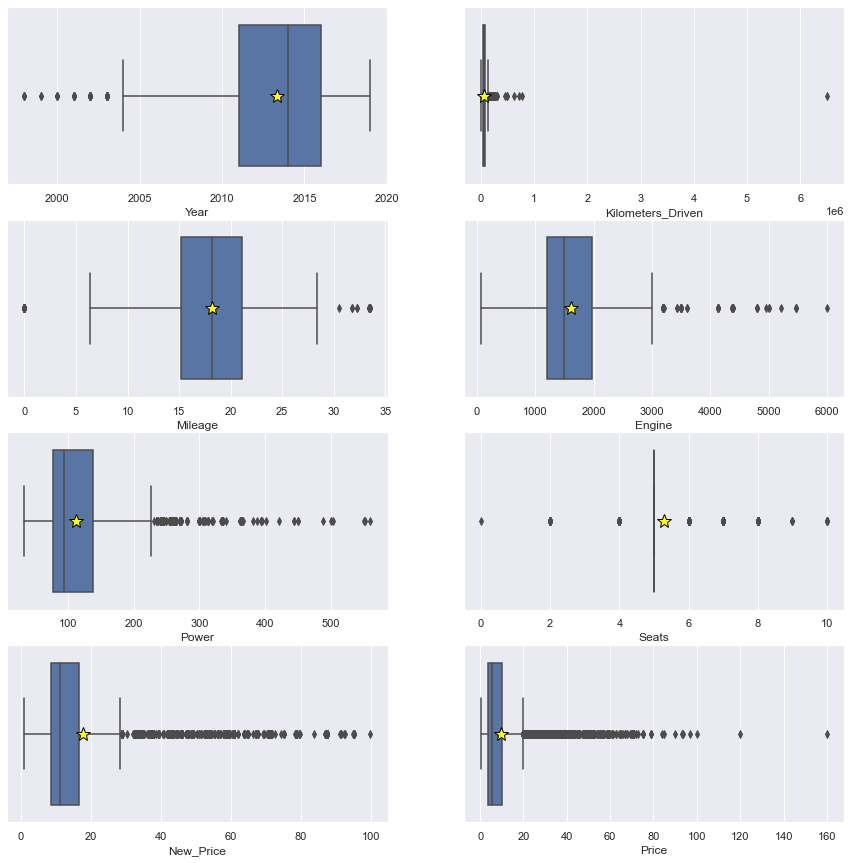

In [19]:
# outlier detection using boxplot
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
# A plot with 4 rows and 2 columns, both zero indexed. 
# Row i and Column j represented by axes[i,j] will represnt one boxplot
# For example the 7th numerical variabble from numerical_col here is Power will have an index equal to 6
# int(6/2)=3 and 6%2=0(the rest) that will be in row number 3(second row) and column number 0(first column)

for i in range(len(numerical_col)):    
    sns.boxplot(ax=axes[int(i/2), i%2], data=dfCars4U, x=dfCars4U[numerical_col[i]],\
                # Plotting the mean on theboxplot as a yellow star with a black edge
                showmeans=True, meanprops={"marker":"*", "markerfacecolor":"yellow", \
                "markeredgecolor":"black","markersize":"15"})                   

**Observations**
* For Seats and Mileage the 0 value is a true outlier, we will fix that by googling the car name and determining the correct value. For the other values they seem to be correct.
* Year has lower outliers.
* Mileage has both lower and upper outliers.
* All other numerical columns have upper outliers.
* We will treat these outliers by assigning the lower wisker value to the lower outliers and the higher wisker value to upper outliers since outliers adversely affect the predictive power of linear model. 

### Bivariate Analysis

#### Relationship between numerical variables using pair plots and correlation plots 

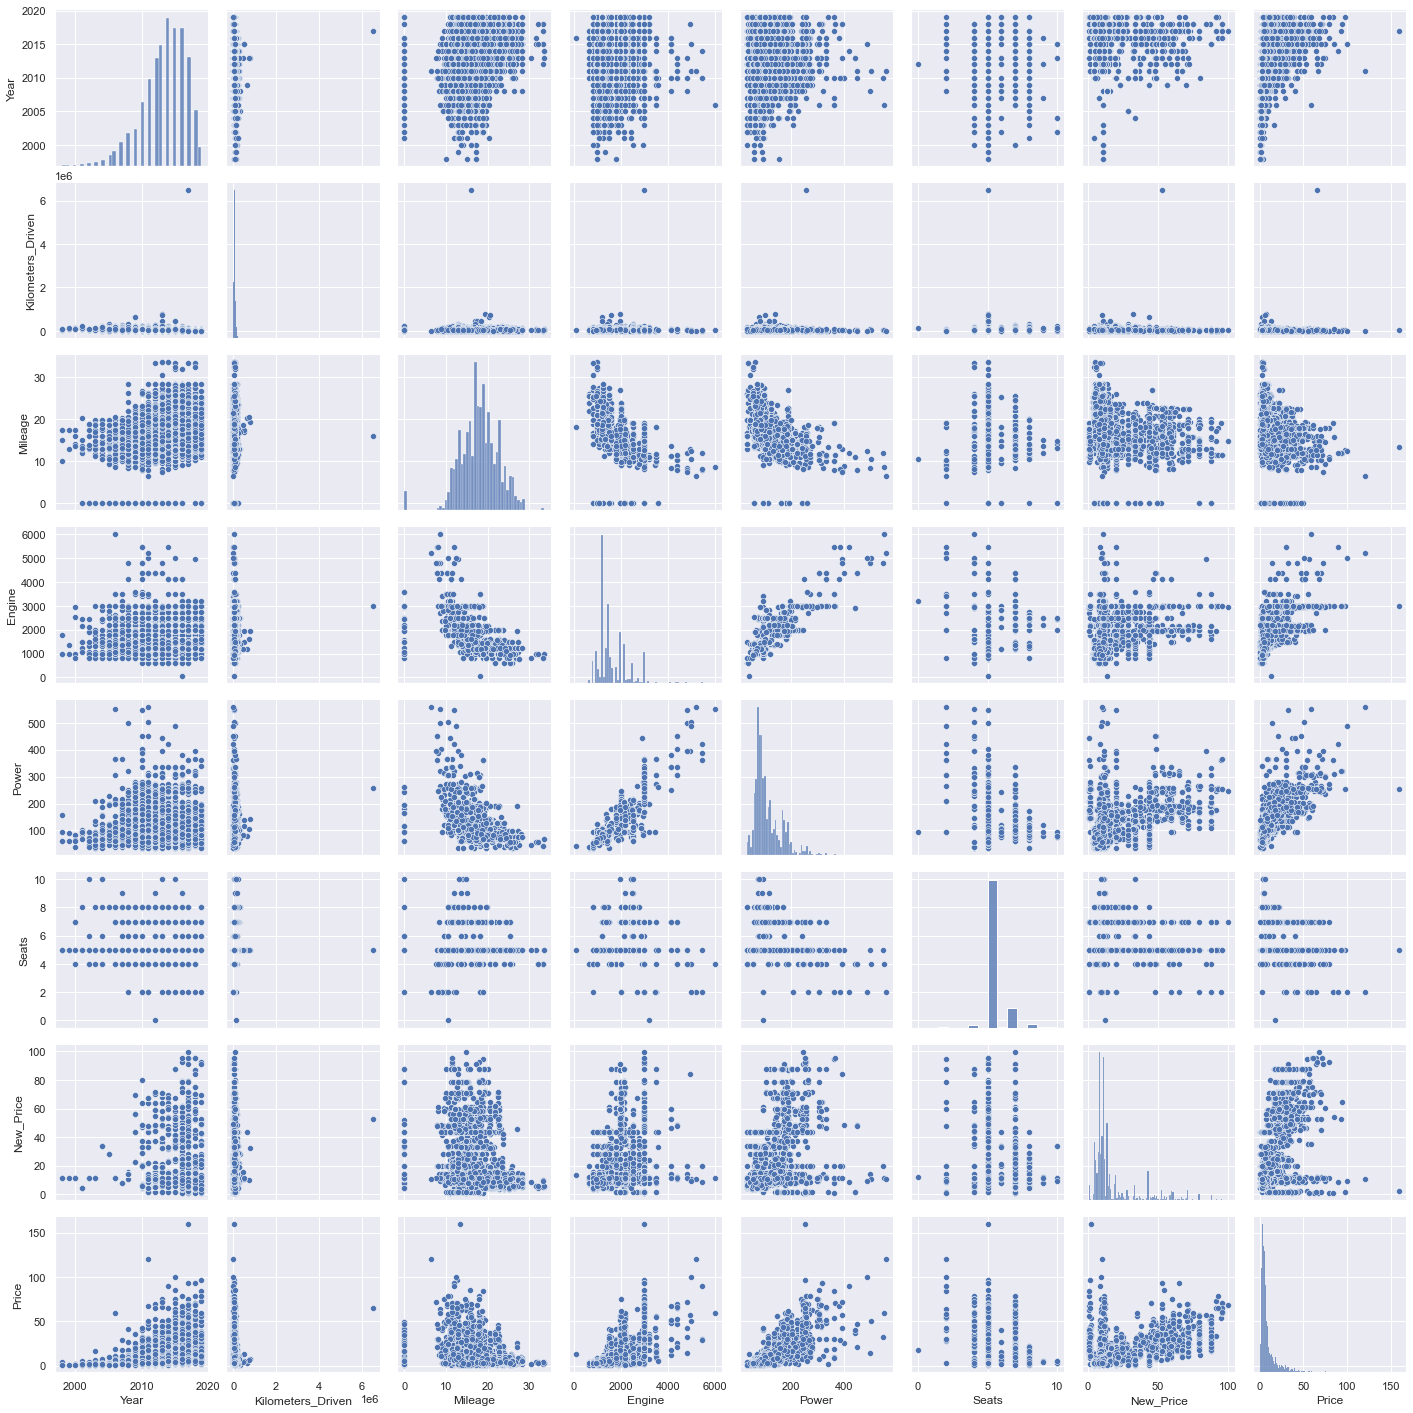

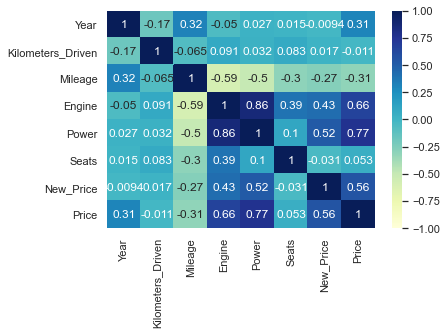

In [20]:
# pairplot: Visualize pairwise relationship in the dataset.
sns.pairplot(dfCars4U)
plt.show()
# heatmap: Plot rectangular data as a color-encoded matrix, where each cell represents the correlation between 
# the two corresponding quantitative attributes
sns.heatmap(dfCars4U.corr(), annot=True, cmap='YlGnBu', vmin=-1, vmax=1);

**Observations**
* (Power, Engine) have a very high positive correlation between , both are independent variables so we will need to drop one. 
* (Power,Price) then (Engine, Price) have a high positive correlations.
* (Power, New_Price) then (New_Price, Engine) then (Seats,Seats) then (Mileage,Year) have a positive correlations.
* (New_Price,Price) then (Year, Price) have a positive correlation, but (Mileage, Price) have a negative correlations.
* (Mileage, Engine) then (Mileage, Power) then (Seats,Mileage) then (New_Price,Mileage) have a negative correlations.
* The rest have a very weak positive or negative correlations.

#### Realtionship between the Price, Fuel_Type , and Transmission

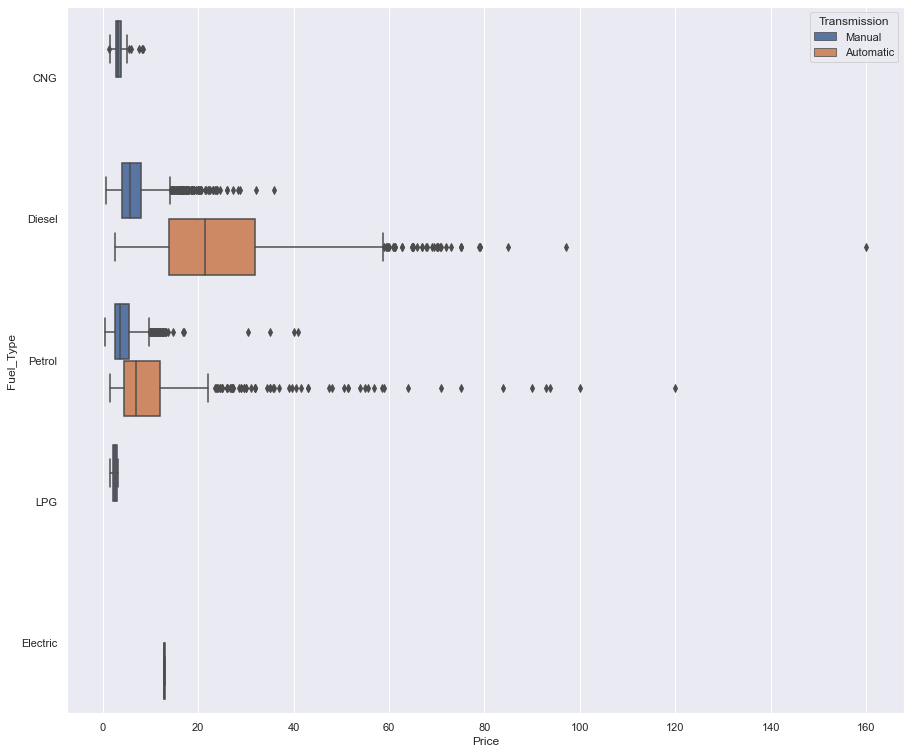

In [21]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(15,13))
sns.boxplot(y='Fuel_Type' ,x='Price',data=dfCars4U,  hue='Transmission');

**Observations**
* The median Price is the heighest when the Transmission is Automatic
* The median Price for Diesel cars is the heighest among all Manual cars.

#### Realtionship between the Price, Owner_Type ,and Transmission

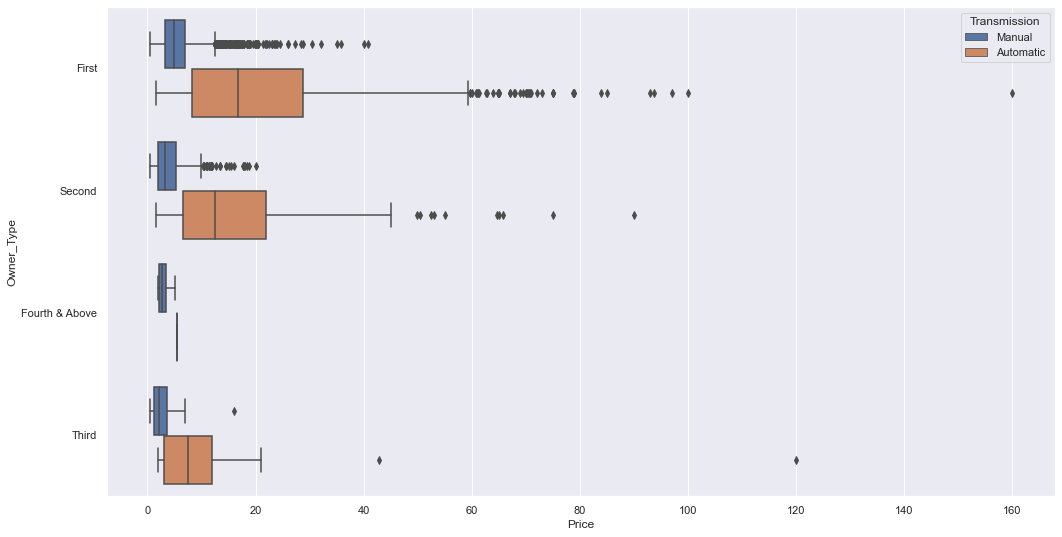

In [22]:
# looking at these relationship in a boxplot graph
plt.figure(figsize=(17,9))
sns.boxplot(y="Owner_Type",x="Price",data=dfCars4U ,hue='Transmission');

**Observations**
* First Owner cars has the heighest median Price than other Owner_Type when compared by Transmission Type.
* Third and Fourth & Above type have the same Median Price for Manual Cars.

#### Realtionship between the Price, New_Price, and Fuel_Type

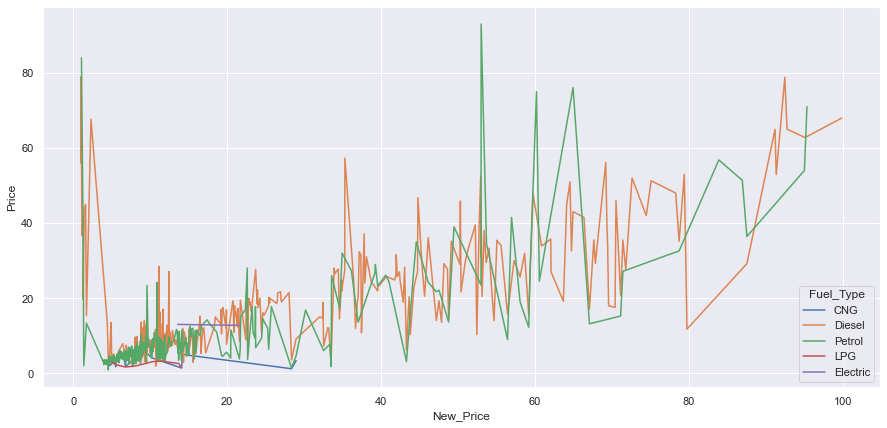

In [23]:
#
plt.figure(figsize=(15,7))
sns.lineplot(x='New_Price', y='Price' ,data=dfCars4U, hue='Fuel_Type', ci=None);

**Observations**
* Overall trend is that the Price increases when the New_Price increases for Diesel and Petrol Fuel_Type cars.
* when the New_Price is very low the the Price can be high this can be explained by the presence of outliers.  

#### Realtionship between the Price, Mileage, and Fuel_Type

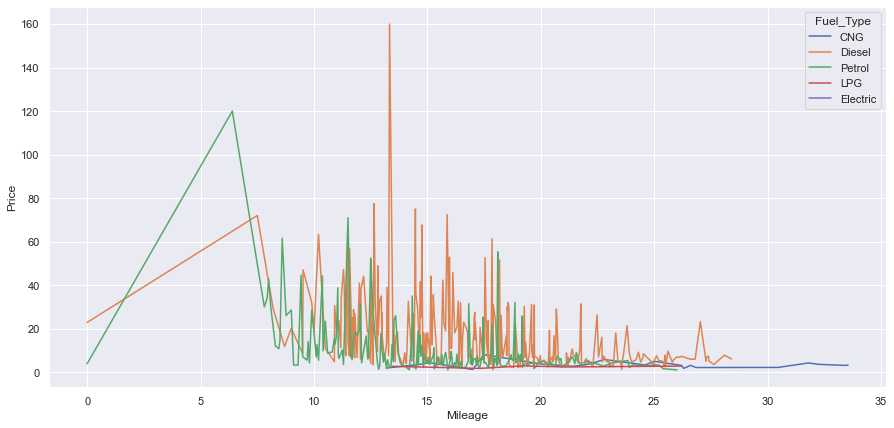

In [24]:
#
plt.figure(figsize=(15,7))
sns.lineplot(x='Mileage', y='Price' ,data=dfCars4U, hue='Fuel_Type', ci=None);

**Observations**
* We expect that when the Mileage increase the Price increases too, The graph trend doesn't show that. This can be explained by the presence of outliers. This observed for All Fuel_Type cars.
* The presence of outliers can explain the high Price when the Mileage is very low which is not logical.  

#### Realtionship between the Price, Year, and Fuel_Type

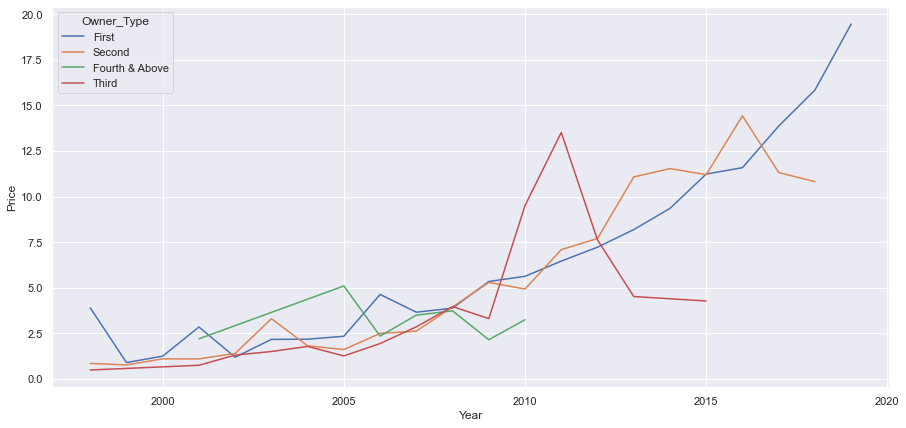

In [25]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price' ,data=dfCars4U, hue='Owner_Type', ci=None);

**Observations**
* The overall trend is that the Price is higher for newer cars except for Fourth & Above Owner_Type.

#### Realtionship between the Price, Year, and Transmission

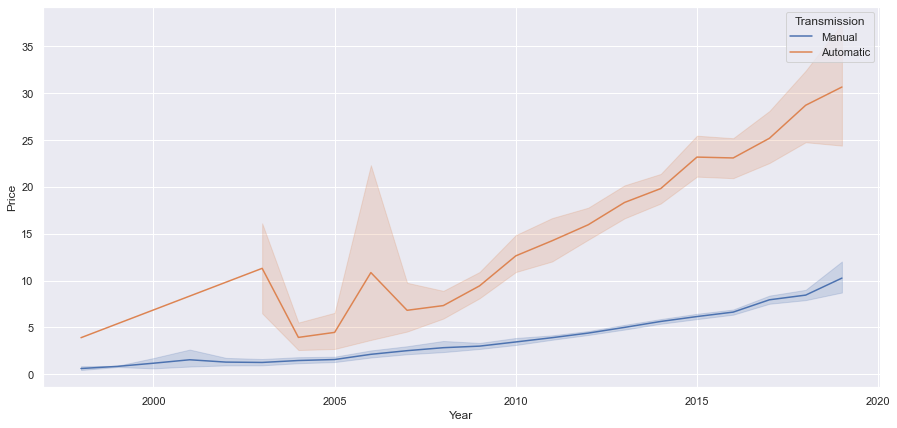

In [26]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',hue='Transmission', data=dfCars4U);

**Observations**
* The Price is higher when the car is newer, this can be observed for both Transmission types.
* The gap between the Price for Automatic cars and Manual cars increases as the car manufuctured year increases.

#### Realtionship between the Price, New_Price, and Fuel_Type

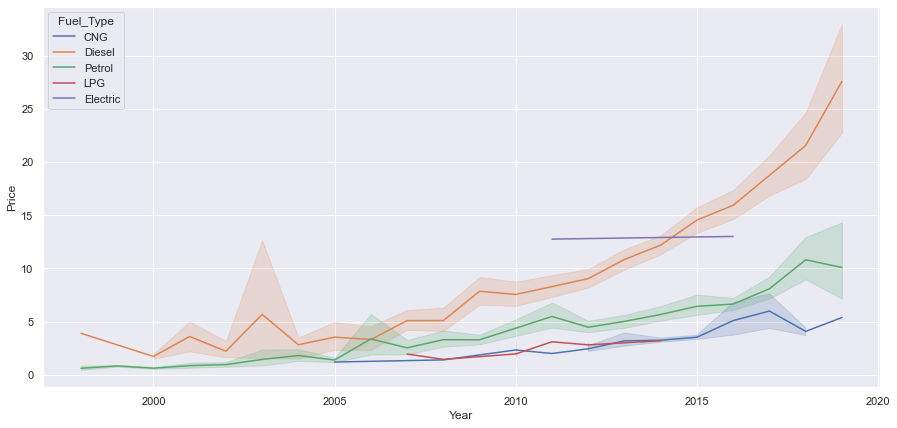

In [27]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',hue='Fuel_Type', data=dfCars4U);

**Observations**
* The price increases for newer cars for all Fuel_Type except the Electric cars where we don't have enough data to confirm that. 

#### Realtionship between the Price, New_Price, and Fuel_Type

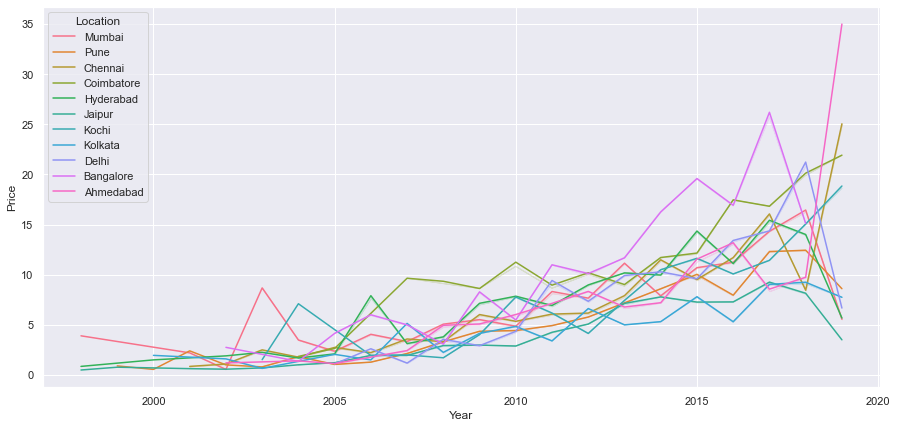

In [28]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Year', y='Price',hue='Location', data=dfCars4U,ci=0);

**Observations**
* The overall trend is that the Price increases for newer cars for all locations.
* Big Price increase for cars manufuctured in or after 2018 in Ahmedabad, Coimbatore, and Jaipour. 

### Outliers Treatment

In [29]:
print(f' there is {dfCars4U.loc[dfCars4U.Seats ==0.0].shape[0]} observations with zero Seats value  and {dfCars4U.loc[dfCars4U.Mileage ==0.0].shape[0]} observations with zero Mileage value')

 there is 1 observations with zero Seats value  and 68 observations with zero Mileage value


**Observations**
* There is 1 row where Seats column equal 0, we will extract the car name and google the number of seats.
* There are 68 rows where Mileage column value equals 0. We will fix by assigning the lower wisker value(Q1 - 1.5*IQR).

In [30]:
#Getting the car's name where the number of seats is equal to 0
print(f' The car Name with 0 seats value is :{dfCars4U.loc[dfCars4U.Seats==0.0].Name.values}')

 The car Name with 0 seats value is :['Audi A4 3.2 Fsi Tiptronic Quattro']


In [31]:
# Audi A4 3.2 Fsi Tiptronic Quattro has 5 seats
dfCars4U.loc[dfCars4U.Seats ==0.0, 'Seats'] = 5.0
# Fixing the same problem in dfCars4U_logged
dfCars4U_logged.loc[dfCars4U_logged.Seats ==0.0, 'Seats'] = np.log(5.0)

In [32]:
# Functions to treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)    
    return df
    

In [33]:
numerical_col = dfCars4U.select_dtypes(include=np.number).columns.tolist()
# Seats outlier value is already fixed.
numerical_col.remove('Seats')
#Treating the outliers in dfCars4U
dfCars4U = treat_outliers_all(dfCars4U,numerical_col)
#Treating the outliers in dfCars4U_logged
dfCars4U_logged = treat_outliers_all(dfCars4U_logged,numerical_col)

### Converting object type column to category type and dropping Engine and Name columns

In [34]:
# Converting object type column to category type for both datasets
for col in ['Brand', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']:
    dfCars4U[col] = dfCars4U[col].astype('category')
    dfCars4U_logged[col] = dfCars4U_logged[col].astype('category')
# Dropping Engine column since it has a very high correlation with Power(Previous observation) for both datasets
dfCars4U.drop('Engine', axis=1, inplace=True)
dfCars4U_logged.drop('Engine', axis=1, inplace=True)
# Dropping catgorical Name column since it has a very high unique values
#we will keep the Brand that capture the important information from Name.
dfCars4U.drop('Name', axis=1, inplace=True) 
dfCars4U_logged.drop('Name', axis=1, inplace=True)

### Creating dummies variable for the catgorical varaibles

In [35]:
#Creating dummies variables for dfCars4U
dfCars4U = pd.get_dummies(dfCars4U, drop_first=True)
#Creating dummies variables for dfCars4U_logged
dfCars4U_logged = pd.get_dummies(dfCars4U_logged, drop_first=True)
dfCars4U.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6019 non-null   float64
 1   Kilometers_Driven          6019 non-null   int64  
 2   Mileage                    6019 non-null   float64
 3   Power                      6019 non-null   float64
 4   Seats                      6019 non-null   float64
 5   New_Price                  6019 non-null   float64
 6   Price                      6019 non-null   float64
 7   Location_Bangalore         6019 non-null   uint8  
 8   Location_Chennai           6019 non-null   uint8  
 9   Location_Coimbatore        6019 non-null   uint8  
 10  Location_Delhi             6019 non-null   uint8  
 11  Location_Hyderabad         6019 non-null   uint8  
 12  Location_Jaipur            6019 non-null   uint8  
 13  Location_Kochi             6019 non-null   uint8

**Observations**
- It looks like our Data is preprocessed, now we are ready to build our models

## Building our  Linear Model

In [36]:
# independant variables
X = dfCars4U.drop('Price', axis=1)
# the dependent variable
y = dfCars4U[['Price']]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [37]:
#Fitting linear model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

### Coefficients Analysis

In [38]:
# Checking the coefficients and intercept of the model
coef_df = pd.DataFrame(data={'FeaturesOrIntercept':X_train.columns.tolist()+['Intercept'],\
                             'Coefficients':np.append(linear_regression.coef_.flatten(), linear_regression.intercept_)})
coef_df                        

,FeaturesOrIntercept,Coefficients
0,Year,0.585374
1,Kilometers_Driven,-0.000014
2,Mileage,-0.148340
3,Power,0.044375
4,Seats,0.242857
5,New_Price,0.032012
6,Location_Bangalore,0.885980
7,Location_Chennai,0.242194
8,Location_Coimbatore,0.687015
9,Location_Delhi,-0.354421


** Observations **
- Among the  numerical variables:
    - Year, Power, Seats, and new prices have a positive coeficients, that means 1 unit increase in the independent variable will increase the Price by that coeficient Lakh.
        - Year and Power have the strongest effect on the dependent variable among this set.
        - For every 1 unit increase in Year will result in an increase of 0.585374 Lakh in the Price, and for Power every 1 unit increase  will result in an increase of 0.585374 Lakh in the price 
    - Kilometers_Driven and Mileage have negative coeficients, that means 1 unit increase in the independent variable will decrease the Price by that coeficient Lakh.
        - For every 10,000 Kilometers_Driven increase the Price will decrease by  0.14Lakh 
        - For every 1 unit increase in the Mileage, the Price will decrease by about 0.148Lakh.
- Among the Categorical variables for every activated state, positive coeficient will increase The Price by that coeficient Lakh and negative coeficient will decrease The Price by that coeficient:
    - Cars sold in Bangalore, Hyderabad, Coimbatore will increase the car Price by 0.88598 Lakh, 0.867153 Lakh, and 0.687015 Lakh, in the other hand cars sold in kalkota will have the strongest negative effect on the Price among all locations with a decrease of 1.136633 Lakh
    - Electric and Diesel cars have a positive effect on the Price with an increase of 6.028892 Lakh, and 1.108191 Lakh in the Price for each corresponding type. 
    - European car brands have mostly an positive effect on the the price Bently, Lamborgini, and Mini are the strongest brands with an in crease in the Price of 7.416170 Lakh, 5.621801 Lakh, and 5.863727 Lakh for each Brand respectively. Isuzu is the worst brand with a decrease of -7.333034 Lakh in the Price for other brands with the same features

### Checking  the model performance

In [39]:
# MAPE: Mean Absolute Percentage Error
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [40]:
# model performance on train set
print('\n\nTraining Performance\n')
print(model_perf(linear_regression, X_train, y_train))



Training Performance

       MAE      MAPE     RMSE      R^2  Adjusted R^2
0 1.347839 29.038231 1.867688 0.893452      0.892095


In [41]:
# model performance on test set
print('Test Performance\n')
print(model_perf(linear_regression, X_test, y_test))

Test Performance

       MAE      MAPE     RMSE      R^2  Adjusted R^2
0 1.311434 27.788823 1.769554 0.909272      0.906527


## Observations and Conclusion

1. Both Accuracy and Error metrics scores' for the training and testing sets are close and comparable(MAE:1.347839 to 1.311434, MAPE:29.038231 to 27.788823, RMSE:1.867688 to 1.769554, $R^2$: 0.893452 to 0.909272, and Adjusted $R^2$:0.892095 to 0.909272 ) with really good values(MAPE is a little high) .Also the scores for the unseen data(Test) are better that the Training data. Hence, the model is a good fit (No overfitting or underfitting).

2. The Adjusted $R^2$ is 0.906527, that explains ~91% of total variation in the dataset. So, overall the model is very satisfactory. Therefore Cars4U can do the following to grow its business:
    - Price the cars for sale using the equation extracted from the model so it will make sure that no cars are sold under the  market price by plugging the variables and their corresponding coefficients in the equation:
    
    - Price= -1171.729927 + $\sum_{n=0}^{52} (nthvariable*nthcoef)\$
    
    - Invest the possible maximum in bying used cars that have the features that increase the Price knowing that:
    
         - Newer cars increases the Price significantly.

         - Cars with lower miles brings higher Prices.

         - European brands increases the Price while No European brands decreases the Price.
         
         - Cars having Electric or\and Automatic features will result in a higher Price.
         
         - Diesel cars are the most sold used cars, and Diesel cars have a positive effect on the Price.
    
    - Also Cars4U should try to open more car lots in the following locations:

         - Bangalore, Hyderabad, and Coimbatore,and Ahmedabad.
         


### Forward Feature Selection
- Forward feature selection starts with an empty model and adds in variables one by one.
- We will try that to see if we can improve our Model Accuracy and reduce the dimensionality at the same time.

In [42]:
# Importing the necessary package for Forward Feature Selection
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

reg = LinearRegression()
# Build step forward feature selection
sfs1 = sfs(reg,k_features = X_train.shape[1], forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.1s finished

[2021-05-09 22:50:14] Features: 1/53 -- score: 0.6477860891642326[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.1s finished

[2021-05-09 22:50:16] Features: 2/53 -- score: 0.7741072473176758[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.3s finished

[2021-05-09 22:50:17] Features: 3/53 -- score: 0.7885933059102431[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.8s finished

[2021-05-09 22:50:46] Features: 28/53 -- score: 0.8862130245744602[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished

[2021-05-09 22:50:46] Features: 29/53 -- score: 0.8864723127409745[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.8s finished

[2021-05-09 22:50:47] Features: 30/53 -- score: 0.8866858731123909[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.7s finished

[2021-05-09 22:50:48] Features: 31/

In [43]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


**Observations**
- We need all the features\independent variables to get the best performance. Therefore we will stop here and keep our first model linear_regression

## Building our Log-Log Linear Model

In [44]:
# independant variables
X = dfCars4U_logged.drop('Price', axis=1)
# the dependent variable
y = dfCars4U_logged[['Price']]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state=1)

In [45]:
#Fitting linear model
linear_regression_logged = LinearRegression()
linear_regression_logged.fit(X_train, y_train)

LinearRegression()

### Coefficients Analysis

In [46]:
# Checking the coefficients and intercept of the model
coef_df_logged = pd.DataFrame(data={'FeaturesOrIntercept':X_train.columns.tolist()+['Intercept'],\
                             'Coefficients':np.append(linear_regression_logged.coef_.flatten(), linear_regression_logged.intercept_)})
coef_df_logged

,FeaturesOrIntercept,Coefficients
0,Year,183.006054
1,Kilometers_Driven,-0.085248
2,Mileage,-0.013909
3,Power,0.716116
4,Seats,0.225387
5,New_Price,0.022545
6,Location_Bangalore,0.147705
7,Location_Chennai,0.032723
8,Location_Coimbatore,0.123388
9,Location_Delhi,-0.041338


**Observations and conclusions**
- We notice that the features coefficients still have the same signs and the same relevance to the Price when compared to the coeficients of the first model:regression_model.
- The exact amount of increase or decrease of the Price won't be directly concluded from the features coeficients as we did with the first model regression_model. Therefore:
    - We will create two functions to calculte that, as we know the target was logged but for the features only the numerical variables(except the Mileage) were logged.
    - First function will deal with the case of logged target and logged feature values, and the second for target and original feature values

In [47]:
def interpret_log_log(coef):
    '''In this case where  variable and target were logged then the percent change in y associated with a
    one-percent increase in X is given by this equation: y=100 × (1.01^coef − 1) 
    coef: variable coefficient
    '''
    return  100 * ( np.power(1.01,coef) - 1)

In [48]:
def interpret_log_linear(coef):
    '''In this case where only the dependent variable is logged then the percent change in y associated with 
    a one unit increase in X is given by this equation: 100 × (𝑒^coef − 1) 
    coef: independent variable coefficient
    '''
    return 100*(np.exp(coef) -1)

In [49]:
logged_features=['Year','Kilometers_Driven','Power', 'Seats', 'New_Price']
features = coef_df_logged['FeaturesOrIntercept'].to_list()
unlogged_features=[elem for elem in features if elem not in logged_features ]
unlogged_features
for col in features:
    idx = coef_df_logged[coef_df_logged.FeaturesOrIntercept == col].index[0]
    if col in logged_features:
        coef_df_logged.loc[idx,'Interpreted_Coefficients']= interpret_log_log( coef_df_logged.loc[idx ,'Coefficients'])
    else:
        coef_df_logged.loc[idx,'Interpreted_Coefficients']= interpret_log_linear( coef_df_logged.loc[idx ,'Coefficients'])         
coef_df_logged


,FeaturesOrIntercept,Coefficients,Interpreted_Coefficients
0,Year,183.006054,517.785292
1,Kilometers_Driven,-0.085248,-0.084788
2,Mileage,-0.013909,-1.381249
3,Power,0.716116,0.715104
4,Seats,0.225387,0.224519
5,New_Price,0.022545,0.022435
6,Location_Bangalore,0.147705,15.917139
7,Location_Chennai,0.032723,3.326473
8,Location_Coimbatore,0.123388,13.132287
9,Location_Delhi,-0.041338,-4.049485


**Observations**
- As expected this model's features significance to the target are very comparable to the first model:
    - Year has a strong positive effect on the car Price. 1% increase in the Year results a Price increase of ~518%. This logical since if a car was built in 2000 then 1% increase means 200 Years. The first model Year coefficient was 0.585374Lakh for 1 year, therefore 0.585374*200 =117.0748Lakh
    - European brands still increase the Price(Bently increase the Price by 161.972189% and Lamborgini by 109.942953%),  while No European brands(Isuzu still the worst decreases the Price by -63.974675%) decrease the Price.
    - Bangalore(car sold here increase the Price by 15.917139%), Hyderabad(increase by 13.751572%), and Coimbatore(by 13.132287%) are still  the best locations for the highest Price increase.
    - Cars having Electric or\and Automatic features still result in a higher Price.

### Checking Model Performance

In [50]:
# model performance on train set
print('\n\nTraining Performance\n')
print(model_perf(linear_regression_logged, X_train, y_train))



Training Performance

       MAE     MAPE     RMSE      R^2  Adjusted R^2
0 0.143555 8.247341 0.194376 0.927899      0.926981


In [51]:
# model performance on test set
print('Test Performance\n')
print(model_perf(linear_regression_logged, X_test, y_test))

Test Performance

       MAE     MAPE     RMSE      R^2  Adjusted R^2
0 0.137496 7.906703 0.180627 0.939492      0.937661


**Observations and conclusion**

- The training and testing scores are even with closer values and very comparable.
- The error scores are lower:
    - MAPE for inear_regression_logged is 7.906703 for Test and 8.247341 for Train compared to 27.788823 and 29.038231 for the first model:regression_model
    - Also the other scores for this model (MAE, RMSE) are lower than the first model!! 
- Performance increased:
    - regression_model_logged has higher $R^2$ and higher Adjusted $R^2$ for both Train and Test than the first model:regression_model
    - Test scores are better than Trainnig scores.
    - The Adjusted $R^2$ is 0.937661, that explains ~94% of total variation in the dataset!!!
- So, this model :regression_model_logged is very satisfactory.
- The features still have the same effect on the target as the first model and as mentioned and expalined previously.

### Forward Feature Selection

In [52]:
reg_logged = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(reg_logged,k_features = X_train.shape[1], forward=True,   # k_features denotes "Number of features to select"
           floating=False, scoring= 'r2',
           verbose=2, cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.2s finished

[2021-05-09 22:51:02] Features: 1/53 -- score: 0.6049864913300579[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    1.1s finished

[2021-05-09 22:51:03] Features: 2/53 -- score: 0.8054758051217155[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    1.1s finished

[2021-05-09 22:51:04] Features: 3/53 -- score: 0.8246625910090006[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.9s finished

[2021-05-09 22:51:33] Features: 28/53 -- score: 0.9211508790319295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished

[2021-05-09 22:51:34] Features: 29/53 -- score: 0.921294602298604[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.8s finished

[2021-05-09 22:51:35] Features: 30/53 -- score: 0.9216011080701229[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.7s finished

[2021-05-09 22:51:36] Features: 31/5

In [53]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


## Observations and Conclusion

- As expected, just like the regression_model We need all the features\independent variables to get the best performance. Therefore we will stop here and keep our linear_regression_logged Model.

- Cars4U should take on consideration the recommendations offered in the conclusion of the linear_regression Model. However for a better Price prediction accuracy, Cars4U should use the linear_regression_logged model to Price the cars intended for sale to further ensure that no cars are sold under the price market.